In [8]:
!git clone https://github.com/muhammadajlal/My-Task.git
%cd My-Task
from iav_flap_anomaly_detection import make_data, plot_data, plot_results
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

Cloning into 'My-Task'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 14 (delta 2), reused 8 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (14/14), 5.24 KiB | 765.00 KiB/s, done.
Resolving deltas: 100% (2/2), done.
/content/My-Task/My-Task


# Installation instructions

To create the data set and show the example plots, you need to install

* matplotlib
* numpy
* sklearn

and you're good to go!

# The problem

Below is your data. We have a system that produces data that normally looks like the left picture. However, there is a special kind of problem that occurs that makes the data shift and flip. Usually, nobody has the time to look at the data and label it - we only have data of which we know that it is probably ok and serves as your training data. Can you tell the problematic data apart anyway?

In [3]:
X_train, X_test, test_ground_truth = make_data()

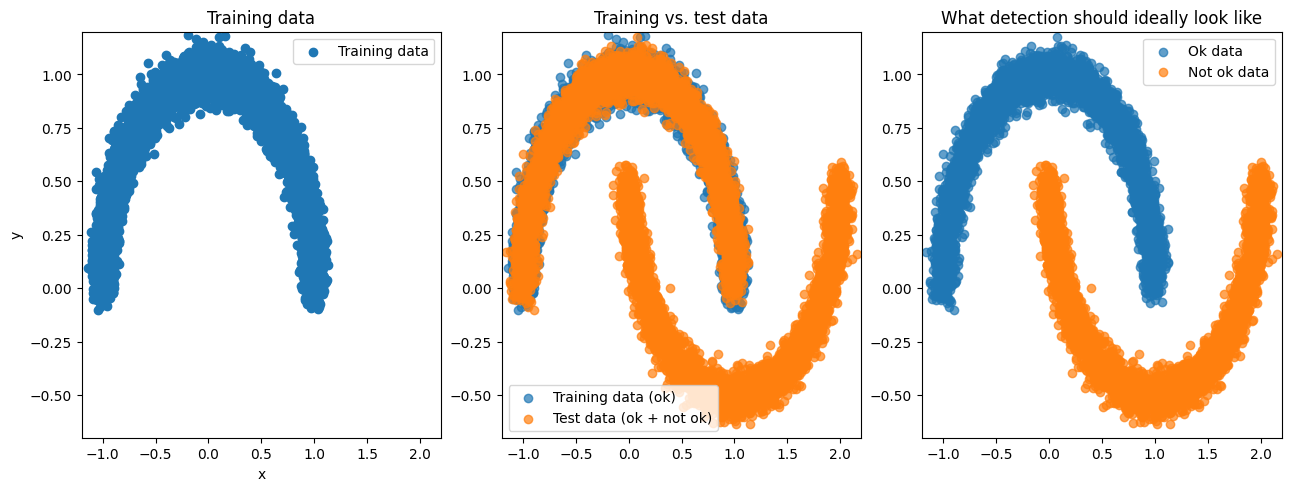

In [4]:
plot_data(X_train, X_test, test_ground_truth)

## Your task

1. Which kind of anomaly detection are you performing?

    1) Supervised
    2) Semi-supervised
    3) Unsupervised

2. Pick a suitable model, for example from scikit-learn (if you know other anomaly detection packages, we're fine with that too)
3. Train it on the training data, and ONLY the training data. Don't cheat by incorporating knowledge about the test set ;-)
4. Try to tell which points of the data are not ok (i.e. don't look like the training data)
5. How good is your model?

## Your solution

Do not hesitate to play around with several different models. Don't worry too much about accuracy - if you're at about 80%, that's fine. We told you the problem is hard ;-) ...

In [44]:
from sklearn.svm import OneClassSVM
model = OneClassSVM(kernel='rbf', gamma=2, nu=0.01)

# Fitting only on normal training data
model.fit(X_train)
y_pred = model.predict(X_test)


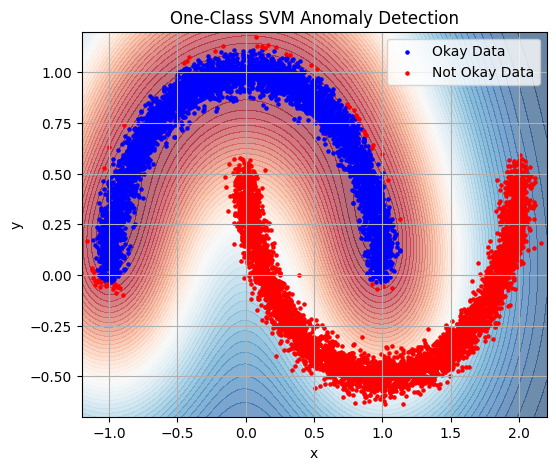

In [45]:

# Setting fixed boundaries to match the last plot
x_min, x_max = -1.2, 2.2
y_min, y_max = -0.7, 1.2

# Defining a meshgrid for contour plotting
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

# Compute the decision function for each point in the grid
Z = model.decision_function(grid)
Z = Z.reshape(xx.shape)

# Plot the final detection with the same visual scale and settings given in question
plt.figure(figsize=(6, 5))
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 50),
             cmap=plt.cm.RdBu_r, alpha=0.6)

# Plot test data points with separate colors and labels:
plt.scatter(X_test[y_pred == 1, 0], X_test[y_pred == 1, 1],
            c='blue', s=5, label='Okay Data')
plt.scatter(X_test[y_pred != 1, 0], X_test[y_pred != 1, 1],
            c='red', s=5, label='Not Okay Data')

# Set the axis limits to match the ideal detection plot
plt.xlim(-1.2, 2.2)
plt.ylim(-0.7, 1.2)
plt.title("One-Class SVM Anomaly Detection")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


In [46]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Assuming test_ground_truth_labels contains ground-truth labels: 1 (normal), -1 (anomaly)
print("Confusion Matrix:")
print(confusion_matrix(test_ground_truth, y_pred))

print("\nClassification Report:")
print(classification_report(test_ground_truth, y_pred))

# ROC-AUC Score (only works if you have decision_function scores)
auc_score = roc_auc_score(test_ground_truth, model.decision_function(X_test))
print(f"\nROC AUC Score: {auc_score:.4f}")


Confusion Matrix:
[[5000    0]
 [  59 4941]]

Classification Report:
              precision    recall  f1-score   support

          -1       0.99      1.00      0.99      5000
           1       1.00      0.99      0.99      5000

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000


ROC AUC Score: 1.0000


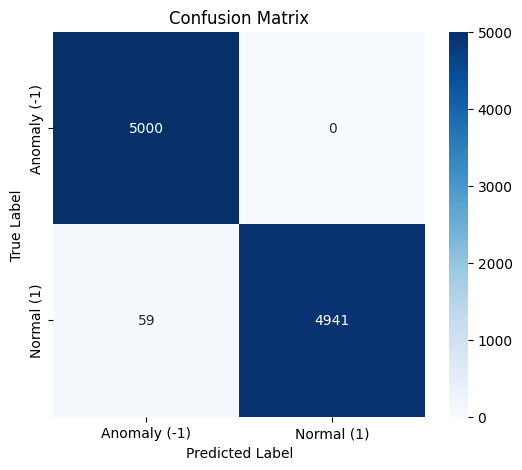

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Extract ground truth and predictions
y_true = test_ground_truth  # Ground truth labels
y_pred = model.predict(X_test)  # Predicted labels

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Define class labels
class_labels = ["Anomaly (-1)", "Normal (1)"]

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
